In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_mice = pd.merge(mouse_metadata, study_results, how='outer')

# Clean up Age_months
combine_mice = combine_mice.rename(columns={"Age_months":"Age (months)"})

# Display the data table for view
combine_mice.head()

,Mouse ID,Drug Regimen,Sex,Age (months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Check the number of mice.
mice = combine_mice['Mouse ID'].value_counts()
mice_number = len(mice)
mice_number

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_dup = combine_mice.loc[combine_mice.duplicated(subset=['Mouse ID', 'Timepoint',]), 'Mouse ID'].unique()

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
dup_mouse_id = pd.DataFrame(mice_dup)
dup_mouse_id

,0
0,g989


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
correct_df = combine_mice[combine_mice['Mouse ID'].isin(mice_dup)==False]
correct_df

,Mouse ID,Drug Regimen,Sex,Age (months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
 # Checking the number of mice in the clean DataFrame.
correct_mice = correct_df["Mouse ID"].unique()
clean_mice = len(correct_mice)
clean_mice

248

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = correct_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
tumor_mean

tumor_median = correct_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
tumor_median

tumor_variance = correct_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
tumor_variance

tumor_stddev = correct_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
tumor_stddev
                                                          
tumor_sem = correct_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
tumor_sem

# Assemble the resulting series into a single summary dataframe.
tumor_regimen = pd.DataFrame({
    "Volume Mean": tumor_mean,
    "Volume Median": tumor_median,
    "Volume Variance": tumor_variance,
    "Volume Standard Deviation": tumor_stddev
#    "Volume SEM": tumor_sem (not sure why "Volume SEM" is throwing invalid syntax)
})

tumor_regimen

,Volume Mean,Volume Median,Volume Variance,Volume Standard Deviation
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.320930,50.446266,43.852013,6.622085
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_group = correct_df.groupby('Drug Regimen')
summary_table = summary_group.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


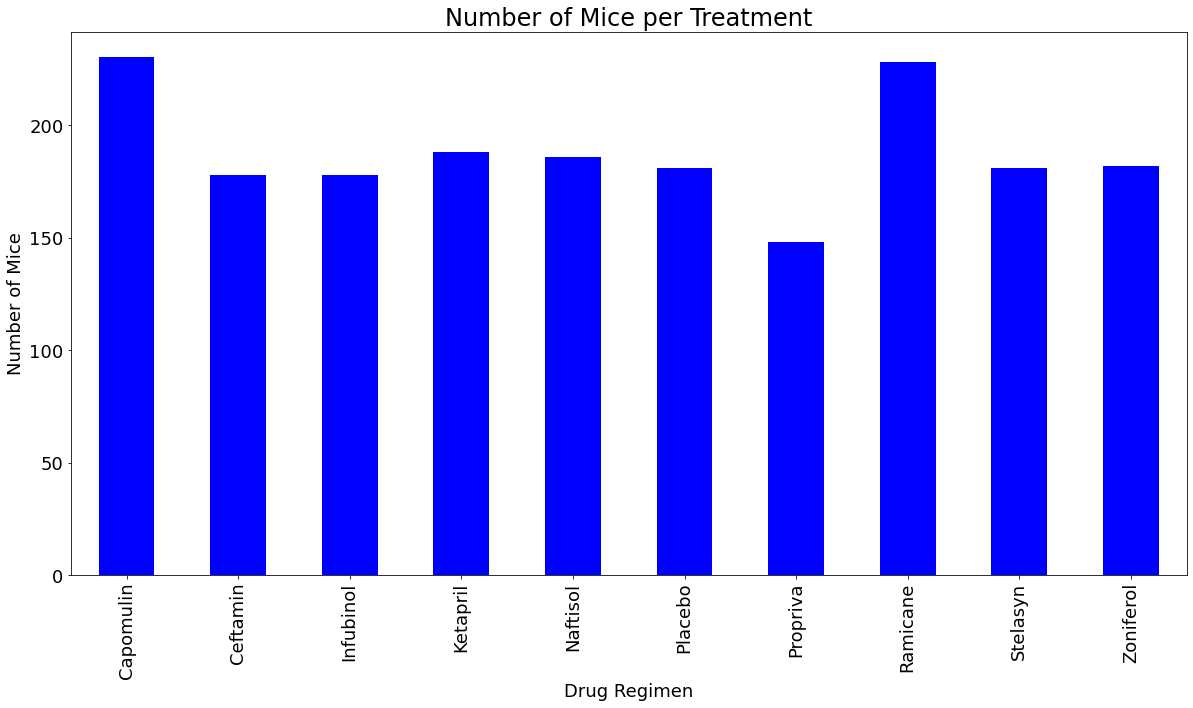

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
mice_treatment = correct_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

plot_treatment = mice_treatment.plot.bar(figsize=(20,10), color='b', fontsize = 18)
mice_treatment
plt.xlabel("Drug Regimen", fontsize = 18)
plt.ylabel("Number of Mice", fontsize = 18)
plt.title("Number of Mice per Treatment", fontsize = 24)
plt.show()

mice_treatment

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

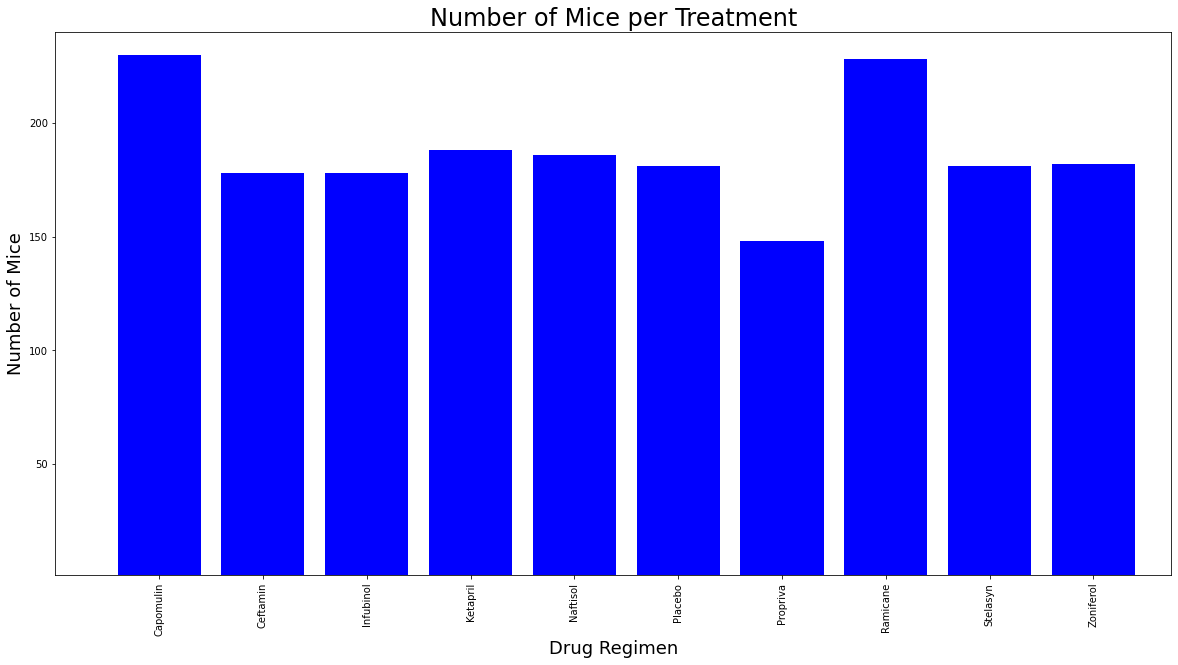

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
mice_list =(correct_df.groupby(["Drug Regimen"])["Mouse ID"].count())

x_axis = np.arange(len(mice_treatment))
fig1, ax1 = plt.subplots(figsize=(20,10))
plt.bar(x_axis, mice_list, color='b', alpha=1, align='center')

tick_location = [value for value in x_axis]

plt.xticks(tick_location, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-1, len(x_axis)-0.25)

plt.ylim(1, max(mice_list)+10)

plt.title("Number of Mice per Treatment",fontsize = 24)
plt.xlabel("Drug Regimen",fontsize = 18)
plt.ylabel("Number of Mice",fontsize = 18)

mice_list

# Couldn't figure out how to make the plots match

In [11]:
#  Group by gender and get the number to plot
mice_gender = correct_df.groupby(["Mouse ID","Sex"])
mice_gender
gender_df = pd.DataFrame(mice_gender.size())

# Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

# create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

# format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

# gender_df
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"].map("{:.1f}%".format)
mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,123,49.6%
Male,125,50.4%


C:\Users\geral\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  


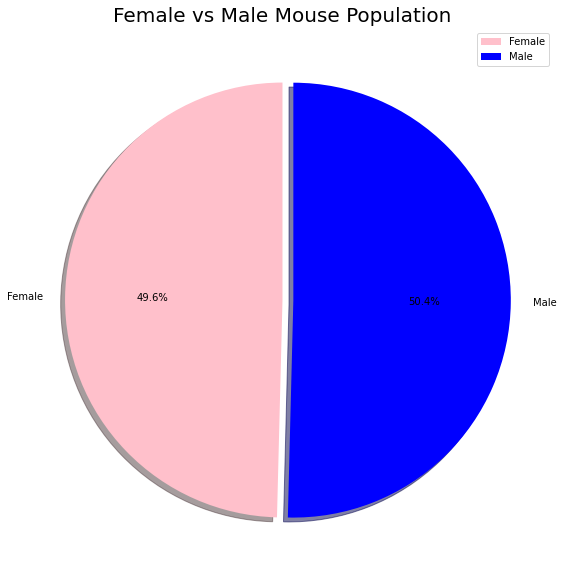

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ['pink', 'blue']
explode = (0, 0.05)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(10,10), colors = colors, startangle=90, explode = explode, shadow = True, autopct="%1.1f%%")

plt.title('Female vs Male Mouse Population',fontsize = 20)
plt.ylabel('',fontsize = 24)
plt.axis("on",fontsize = 24)

plt.show()
plt.tight_layout()

C:\Users\geral\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.


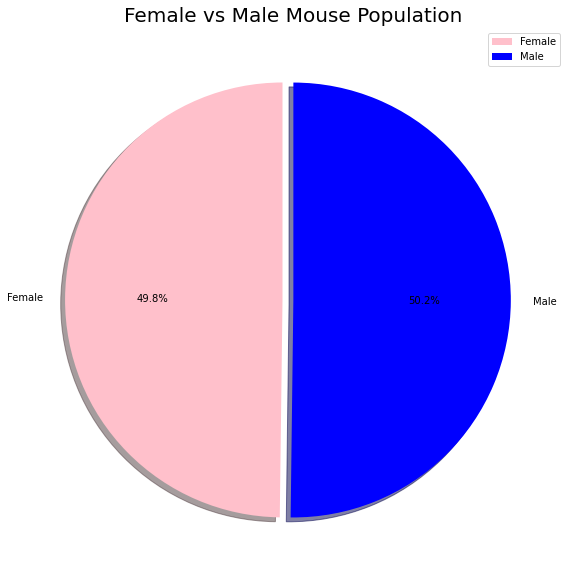

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create Labels for the sections of the pie
labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49.799197,50.200803]

#Set colors for each section of the pie
colors = ['pink', 'blue']

#Determoine which section of the circle to detach
explode = (0.05, 0)

#Create the pie chart based upon the values 
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90,)
plt.title('Female vs Male Mouse Population',fontsize = 20)
plt.ylabel('',fontsize = 24)
plt.axis("on",fontsize = 24)
plt.legend(loc= "best")

plt.show()
plt.tight_layout()

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Capomulin_df = correct_df.loc[correct_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = correct_df.loc[correct_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = correct_df.loc[correct_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = correct_df.loc[correct_df["Drug Regimen"] == "Ceftamin", :]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, correct_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age (months),Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [15]:
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, correct_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age (months),Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [16]:
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, correct_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age (months),Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [17]:
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, correct_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age (months),Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [18]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles = Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of treatment is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [19]:
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [20]:
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

quartiles =Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol tumors is: {lowerq}")
print(f"The upper quartile of Infubinol tumors is: {upperq}")
print(f"The interquartile range of Infubinol tumors is: {iqr}")
print(f"The median of Infubinol tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
The median of Infubinol tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [21]:
Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of treatment is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


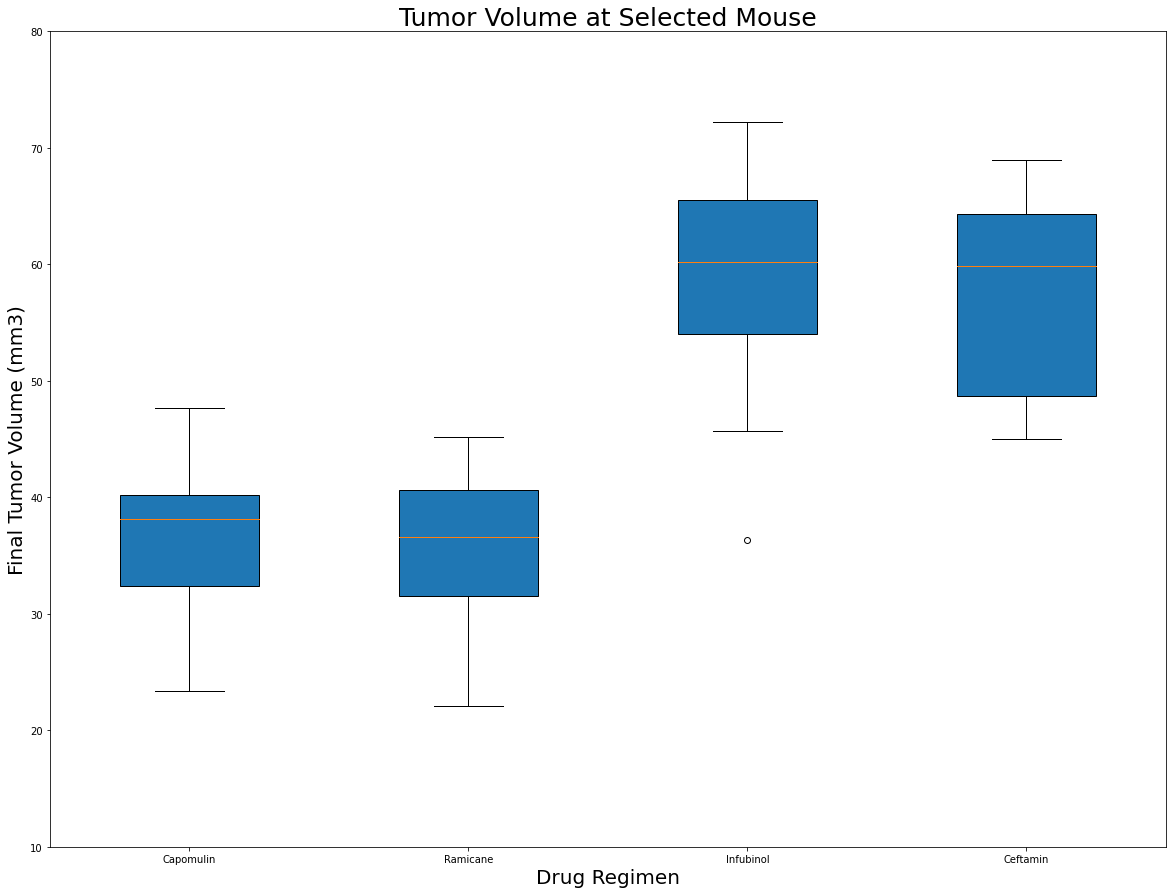

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot_data = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(20, 15))
ax1.set_title('Tumor Volume at Selected Mouse',fontsize =25)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 20)
ax1.set_xlabel('Drug Regimen',fontsize = 20)
ax1.boxplot(box_plot_data, labels=Regimen, widths = 0.5, patch_artist=True,vert=True)

plt.ylim(10, 80)

plt.show()

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "b742",:]
line_plot_df.head()

,Mouse ID,Drug Regimen,Sex,Age (months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
290,b742,Capomulin,Male,7,21,0,45.000000,0
291,b742,Capomulin,Male,7,21,5,41.534097,0
292,b742,Capomulin,Male,7,21,10,41.999228,0
293,b742,Capomulin,Male,7,21,15,39.524843,0
294,b742,Capomulin,Male,7,21,20,37.950355,0


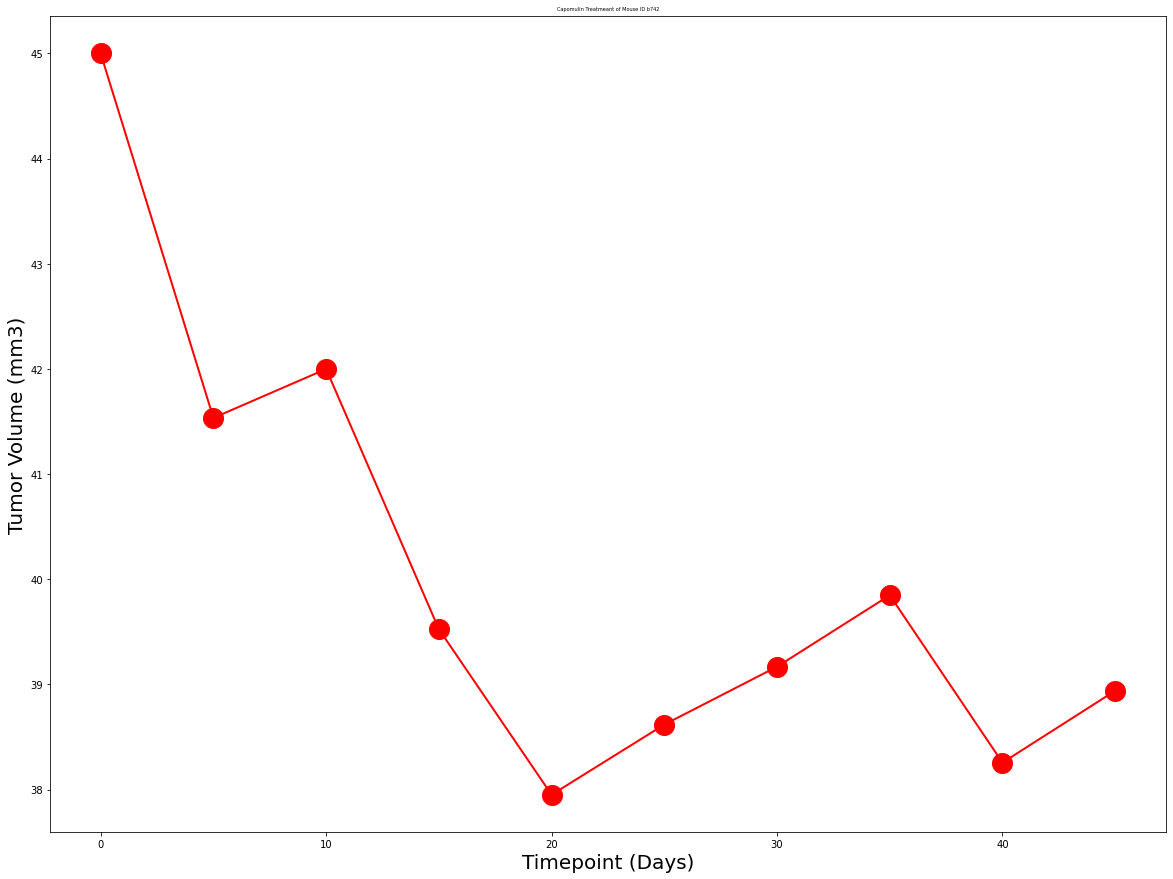

In [25]:
x_axis = line_plot_df["Timepoint"]
tumor_size = line_plot_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(20, 15))
plt.title('Capomulin Treatmeant of Mouse ID b742',fontsize = 5)
plt.plot(x_axis, tumor_size, linewidth=2, markersize= 20, marker="o", color="red", label="Fahreneit")
plt.xlabel('Timepoint (Days)',fontsize =20)
plt.ylabel('Tumor Volume (mm3)',fontsize =20)

plt.show()

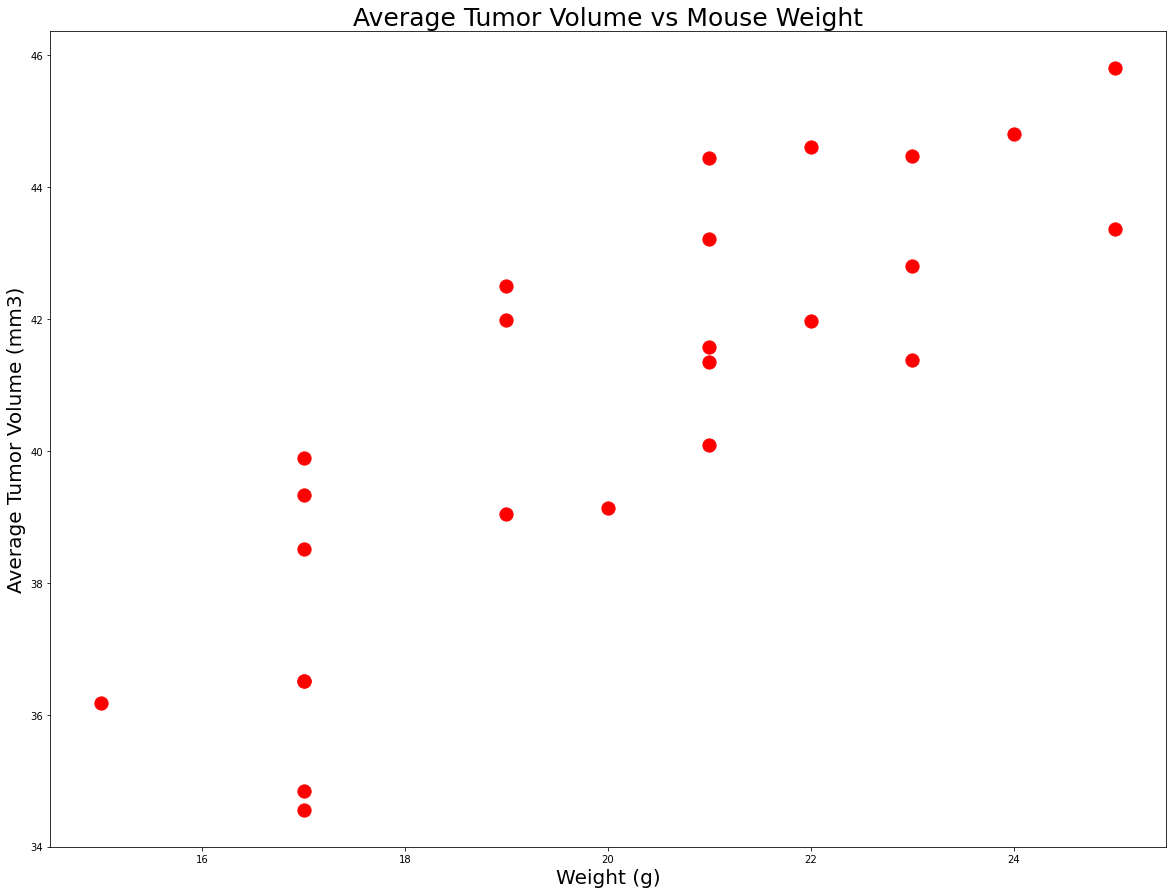

In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(20, 15))
avg_tumor_volume = Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=10
plt.scatter(avg_tumor_volume['Weight (g)'],avg_tumor_volume['Tumor Volume (mm3)'],s=175, color="red")
plt.title('Average Tumor Volume vs Mouse Weight',fontsize=25)
plt.xlabel('Weight (g)',fontsize = 20)
plt.ylabel('Average Tumor Volume (mm3)',fontsize = 20)

plt.show()

In [29]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr=round(st.pearsonr(avg_tumor_volume['Weight (g)'],avg_tumor_volume['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


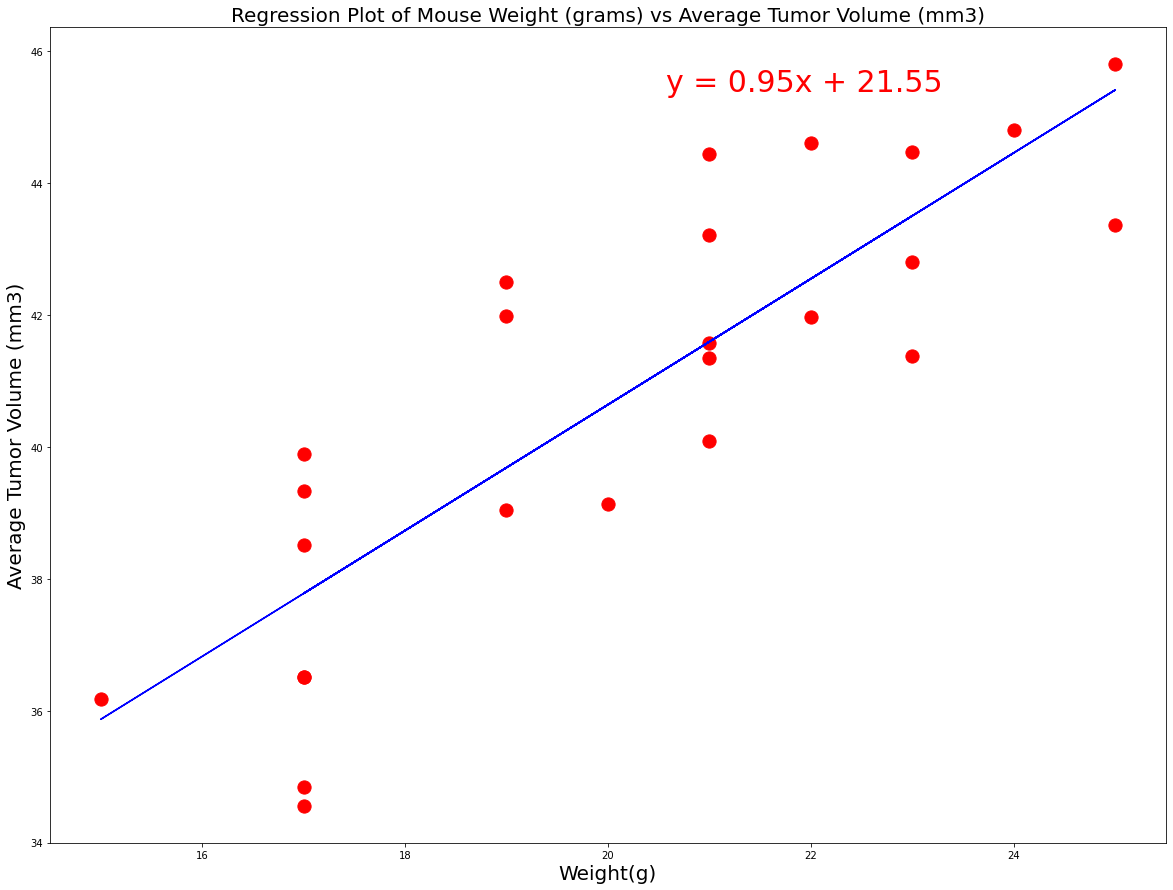

In [35]:
x_values = avg_tumor_volume['Weight (g)']
y_values = avg_tumor_volume['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(20, 15))
plt.scatter(x_values,y_values,s=175, color="red")
plt.plot(x_values,regress_values,"b-")
plt.title('Regression Plot of Mouse Weight (grams) vs Average Tumor Volume (mm3)',fontsize =20)
plt.xlabel('Weight(g)',fontsize =20)
plt.ylabel('Average Tumor Volume (mm3)',fontsize =20)
ax1.annotate(line_equation, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

plt.show()